<a href="https://colab.research.google.com/github/pismacx/Data-analytics-projects/blob/main/nba_players_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NBA PLAYERS STATS ANALYSIS USING PYTHON (1996 - 2021)

THE DATASET COMES FROM: https://www.kaggle.com/datasets/justinas/nba-players-data

-- importing libraries and reading data set from csv 

In [1]:
#uncomment line below if u are using google collab
!wget https://github.com/pismacx/Data-analytics-projects/blob/main/all_seasons.csv

--2023-03-14 15:19:30--  https://github.com/pismacx/Data-analytics-projects/blob/main/all_seasons.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘all_seasons.csv’

all_seasons.csv         [ <=>                ] 135.38K  --.-KB/s    in 0.04s   

2023-03-14 15:19:30 (3.34 MB/s) - ‘all_seasons.csv’ saved [138633]



In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
players = pd.read_csv('all_seasons.csv', error_bad_lines=False)


<ipython-input-12-77ae8d1e96f9>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  players = pd.read_csv('all_seasons.csv', error_bad_lines=False)
b'Skipping line 27: expected 1 fields, saw 367\nSkipping line 89: expected 1 fields, saw 3\nSkipping line 134: expected 1 fields, saw 3\nSkipping line 198: expected 1 fields, saw 3\nSkipping line 207: expected 1 fields, saw 6\nSkipping line 239: expected 1 fields, saw 4\nSkipping line 252: expected 1 fields, saw 4\nSkipping line 265: expected 1 fields, saw 4\nSkipping line 278: expected 1 fields, saw 4\nSkipping line 291: expected 1 fields, saw 4\nSkipping line 304: expected 1 fields, saw 4\nSkipping line 317: expected 1 fields, saw 4\nSkipping line 330: expected 1 fields, saw 4\nSkipping line 347: expected 1 fields, saw 4\nSkipping line 354: expected 1 fields, saw 4\nSkipping line 363: expected 1 fields, saw 4\nSkipping line 372: expected 1 fields, 

--cleaning the data, deleting the players that played less than 5 games in a single season 

In [ ]:
players.drop(players[players['gp'] < 5 ].index, inplace = True)

#Getting the best players in each category (points, assists, rebounds, net_rating)

In [ ]:
records = []
most_pts_pg_index = players['pts'].idxmax()
most_ptsPG_row = players.loc[most_pts_pg_index]
most_pts_txt = f"MOST POINTS PER GAME: {most_ptsPG_row['player_name']} - { most_ptsPG_row['pts']}"
records.append(most_pts_txt)
    
    
most_ast_pg_index = players['ast'].idxmax()
most_ast_row = players.loc[most_ast_pg_index]
most_ast_txt = f"MOST ASSISTS PER GAME: {most_ast_row['player_name']} - {most_ast_row['ast']}"
records.append(most_ast_txt)
    
    
most_rb_index = players['reb'].idxmax()
most_rb_row = players.loc[most_rb_index]
most_rb_txt = f"MOST REBOUNDS PER GAME: {most_rb_row['player_name']} - {most_rb_row['reb']}"
records.append(most_rb_txt)
    
        
max_nr_index = players['net_rating'].idxmax()
max_nr_row = players.loc[max_nr_index]
max_nr_txt = f"BIGGEST NET RATING: {max_nr_row['player_name']} - {max_nr_row['net_rating']}"
records.append(max_nr_txt)

records 



['MOST POINTS PER GAME: James Harden - 36.1',
 'MOST ASSISTS PER GAME: Rajon Rondo - 11.7',
 'MOST REBOUNDS PER GAME: Danny Fortson - 16.3',
 'BIGGEST NET RATING: John Lucas III - 46.9']

# BEST SCORING SEASON IN EACH TEAM BY A SINGLE PLAYER

In [ ]:
grouped = players.groupby("team_abbreviation")
best_scorers_idx = grouped["pts"].idxmax()
best_scorers = players.loc[best_scorers_idx]

best_scorers[['player_name','pts', 'team_abbreviation', 'season']]

,player_name,pts,team_abbreviation,season
10772,Trae Young,29.6,ATL,2019-20
12164,Kevin Durant,29.9,BKN,2021-22
9544,Isaiah Thomas,28.9,BOS,2016-17
10599,Kemba Walker,25.6,CHA,2018-19
93,Glen Rice,26.8,CHH,1996-97
392,Michael Jordan,29.6,CHI,1996-97
4323,LeBron James,31.4,CLE,2005-06
10694,Luka Doncic,28.8,DAL,2019-20
4845,Carmelo Anthony,28.9,DEN,2006-07
2041,Jerry Stackhouse,29.8,DET,2000-01


# COMPARING AVERAGE POINTS SCORED IN EVERY SEASON BY ALL TEAMS 
# DIFFERENCE IN AVERAGE POINTS SCORED IS NOT BIG, BUT THE PLOT IS SHOWING SCORING OF ALL PLAYERS AND ALL TEAMS 

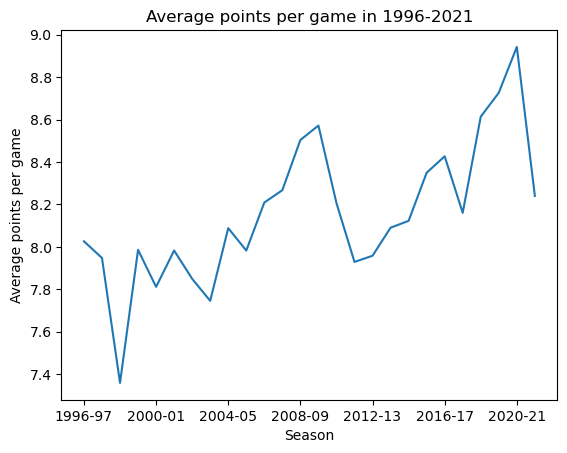

In [ ]:
fig, ax = plt.subplots()  
AveragePoints = players.groupby('season')['pts'].mean()
ax.plot(AveragePoints)
ax.set_title("Average points per game in 1996-2021")
    
ax.set_xlabel('Season')  
ax.set_ylabel('Average points per game')
ax.autoscale(enable=True, axis='x')
ax.set_xticks(AveragePoints.index[::4])

# AVERAGE GAMES PLAYED IN A SINGLE SEASON ACROSS THE YEARS

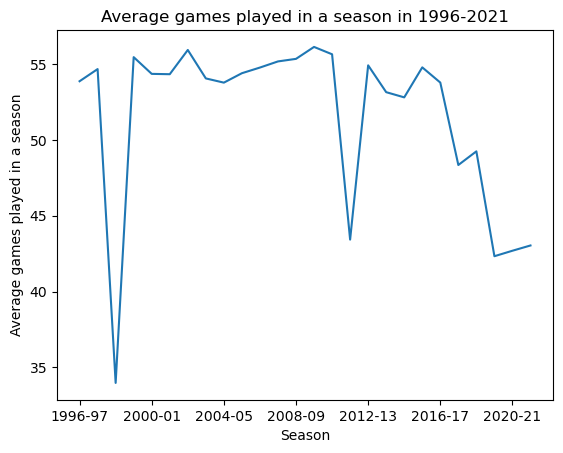

In [ ]:
fig, ax = plt.subplots()  # creates new chart object
averageGamesPlayed = players.groupby('season')['gp'].mean()
ax.plot(averageGamesPlayed) # draws a chart


ax.set_title("Average games played in a season in 1996-2021")    
ax.set_xlabel('Season') # label of x
ax.set_ylabel('Average games played in a season') # y label
ax.autoscale(enable=True, axis='x') # autoscalling X
ax.set_xticks(averageGamesPlayed.index[::4])

# Measure of the player's shooting efficiency that takes into account free throws, 2 and 3 point shots

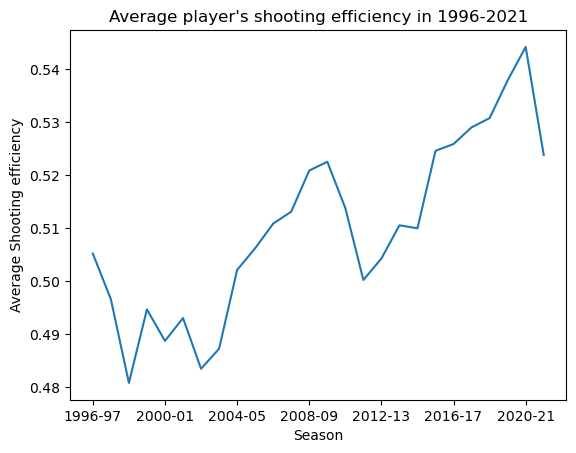

In [ ]:
fig, ax = plt.subplots()
shooting = players.groupby('season')['ts_pct'].mean()
ax.plot(shooting)
ax.set_title("Average player's shooting efficiency in 1996-2021")
    
ax.set_xlabel('Season')
ax.set_ylabel('Average Shooting efficiency')
ax.autoscale(enable=True, axis='x')
ax.set_xticks(shooting.index[::4])

# THIS PART ANALYSE THE PHYSICALS ASPECTS OF PLAYERS ACROSS THE YEARS 

-- AVERAGE AGE 

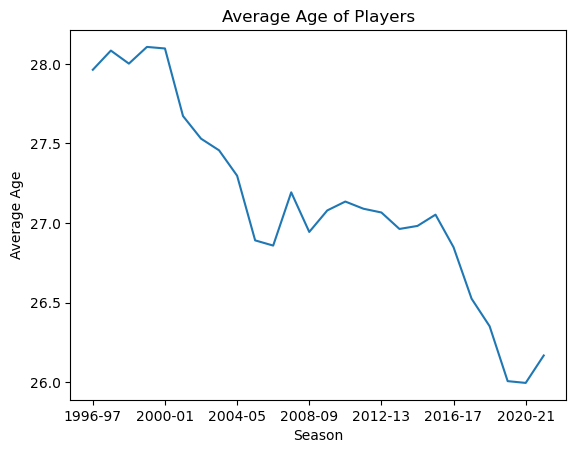

In [ ]:
averageAge = players.groupby('season')['age'].mean()
fig, ax = plt.subplots()
ax.plot(averageAge)
ax.set_title('Average Age of Players')
    
ax.set_xlabel('Season')
ax.set_ylabel('Average Age')
ax.autoscale(enable=True, axis='x')
ax.set_xticks(averageAge.index[::4])

--AVERAGE HEIGHT

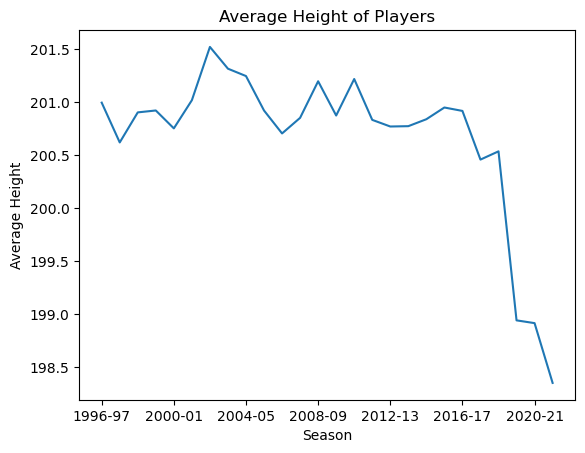

In [ ]:
averageHeight = players.groupby('season')['player_height'].mean()
fig, ax = plt.subplots()
ax.plot(averageHeight)
ax.set_title('Average Height of Players', )
    
ax.set_xlabel('Season')
ax.set_ylabel('Average Height')
ax.autoscale(enable=True, axis='x')
ax.set_xticks(averageAge.index[::4])

--AVERAGE WEIGHT

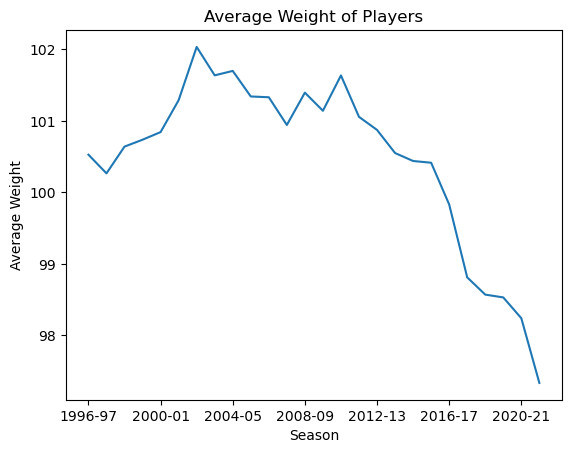

In [ ]:
averageWeight = players.groupby('season')['player_weight'].mean()
fig, ax = plt.subplots()
ax.plot(averageWeight)
ax.set_title('Average Weight of Players')
    
ax.set_xlabel('Season')
ax.set_ylabel('Average Weight')
ax.autoscale(enable=True, axis='x')
ax.set_xticks(averageAge.index[::4])

# COLLEGE BASED ANALYSIS 

-- TOP 40 COLLEGES WITH THE BIGGEST NUMBER OF PLAYERS DRAFTED 

In [ ]:
players_drafted =players[players['draft_year'] != 'undrafted']
college_counts = players_drafted.groupby('college').size()
college_counts = college_counts.reset_index(name='count')
college_counts = college_counts.drop(college_counts[college_counts['college'] == 'None'].index) #clearing data
college_counts = college_counts.drop(college_counts[college_counts['college'] == 'No College'].index)
college_counts = college_counts.sort_values(by='count', ascending=False).head(40)

college_counts

,college,count
125,Kentucky,420
76,Duke,384
192,North Carolina,344
298,UCLA,307
9,Arizona,279
122,Kansas,278
63,Connecticut,230
98,Georgia Tech,190
84,Florida,188
161,Michigan,188


--TOP 5 COLLEGES WHICH PLAYERS AVERAGED THE HIGHEST POINTS PER GAME IN NBA

Text(0, 0.5, 'Points')

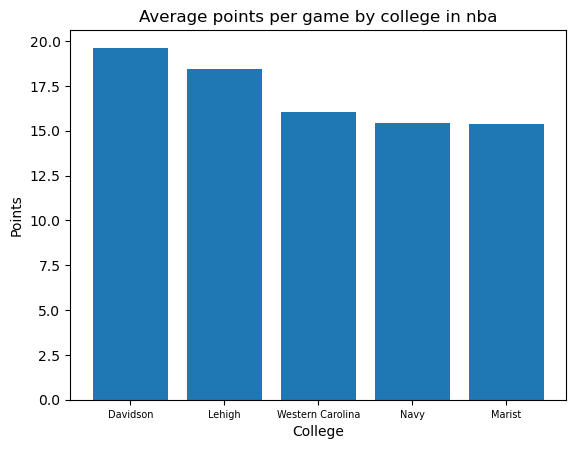

In [ ]:
college_pts = players_drafted.groupby('college')['pts'].mean()
college_pts = college_pts.reset_index(name ='college_pts' )
top5 = college_pts.sort_values(by = 'college_pts', ascending = False).head(5)
    
fig, ax = plt.subplots()
plt.bar(top5['college'], top5['college_pts'])
plt.xticks(fontsize=7)
ax.set_title('Average points per game by college in nba')
ax.set_xlabel('College')
ax.set_ylabel('Points')

# ADDITION: COUNTRIES WITH THE MOST NBA PLAYERS

Text(0, 0.5, 'number of players')

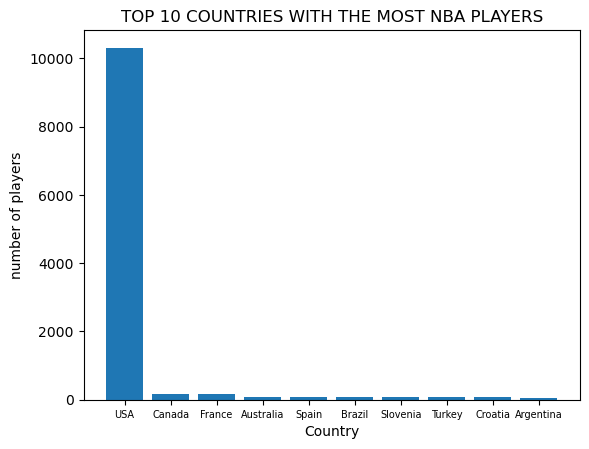

In [ ]:
countries_count = players.groupby('country').size()
countries_count = countries_count.reset_index(name='count')
top10 = countries_count.sort_values(by = 'count', ascending = False).head(10)
    
fig, ax = plt.subplots()
plt.bar(top10['country'], top10['count'])
plt.xticks(fontsize=7)
ax.set_title('TOP 10 COUNTRIES WITH THE MOST NBA PLAYERS')
ax.set_xlabel('Country')
ax.set_ylabel('number of players')